In [1]:
from profiler.core import *

In [2]:
pf = Profiler(workers = 2, tol=1e-6, eps=0.05, embedtxt=True)

In [3]:
pf.session.load_data(name='child', src=FILE, fpath='../table/child/child.csv', check_param=True, na_values='empty')

INFO:profiler.utility:[0.010875940322875977] Load Data start

INFO:profiler.data.dataset:parameters used for data loading:
 {'na_values': 'empty', 'sep': ',', 'header': 'infer', 'dropcol': None, 'dropna': False, 'encoding': 'utf-8', 'normalize': True, 'min_categories_for_embedding': 10}
INFO:profiler.data.dataset:inferred types of attributes: {
    "XrayReport": "categorical",
    "CardiacMixing": "categorical",
    "RUQO2": "categorical",
    "CO2": "categorical",
    "Sick": "categorical",
    "BirthAsphyxia": "categorical",
    "LVHreport": "categorical",
    "Age": "categorical",
    "LowerBodyO2": "categorical",
    "DuctFlow": "categorical",
    "Disease": "categorical",
    "GruntingReport": "categorical",
    "LungFlow": "categorical",
    "Grunting": "categorical",
    "HypDistrib": "categorical",
    "LungParench": "categorical",
    "CO2Report": "categorical",
    "HypoxiaInO2": "categorical",
    "ChestXray": "categorical",
    "LVH": "categorical"
}
INFO:profiler.data.data

In [4]:
pf.session.load_training_data(multiplier = None, difference=True)

INFO:profiler.utility:[0.09626221656799316] Create Training Data start

INFO:profiler.data.transformer:needs multiplier = 13 to bound the error in inv cov estimation <= 0.05000000
INFO:profiler.data.transformer:use multiplier = 13, and the bound is 0.00108922
INFO:profiler.data.transformer:Draw Pairs
100%|██████████| 20/20 [00:00<00:00, 329.06it/s]
INFO:profiler.data.transformer:Number of training samples: 20000
INFO:profiler.data.transformer:Computing Differences
INFO:profiler.data.transformer:estimated missing data probability in training data is 0.0000
INFO:profiler.utility:[0.43561840057373047] Create Training Data execution time: 0.3393561840057373



In [5]:
autoregress_matrix = pf.session.learn_structure(sparsity=0, infer_order=True)

INFO:profiler.utility:[0.44144582748413086] Learn Structure start

INFO:profiler.learner:use threshold 1.3578
INFO:profiler.utility:[0.6070153713226318] Learn Structure execution time: 0.16556954383850098



In [6]:
parent_sets = pf.session.get_dependencies(score="fit_error")

INFO:profiler.utility:[0.613318681716919] Get Dependencies start

INFO:profiler.utility:[0.6976816654205322] Get Dependencies execution time: 0.08436298370361328



CO2 -> CO2Report (0.18239181904706084)
BirthAsphyxia -> HypDistrib (0.1506928731244683)
LVH -> LVHreport (0.10456063677930515)
LVH -> Disease (0.18252865057825599)
Disease -> CardiacMixing (0.1987844612585686)
ChestXray -> LungFlow (0.19607105744815528)
ChestXray -> XrayReport (0.12019014371134593)
Grunting -> LungParench (0.20510784001625157)
Grunting -> GruntingReport (0.17553434806977303)
{'RUQO2': array([], dtype=object), 'Sick': array([], dtype=object), 'Age': array([], dtype=object), 'LowerBodyO2': array([], dtype=object), 'DuctFlow': array([], dtype=object), 'HypoxiaInO2': array([], dtype=object), 'CO2': array([], dtype=object), 'CO2Report': array(['CO2'], dtype=object), 'BirthAsphyxia': array([], dtype=object), 'HypDistrib': array(['BirthAsphyxia'], dtype=object), 'LVH': array([], dtype=object), 'LVHreport': array(['LVH'], dtype=object), 'Disease': array(['LVH'], dtype=object), 'CardiacMixing': array(['Disease'], dtype=object), 'ChestXray': array([], dtype=object), 'LungFlow': 

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


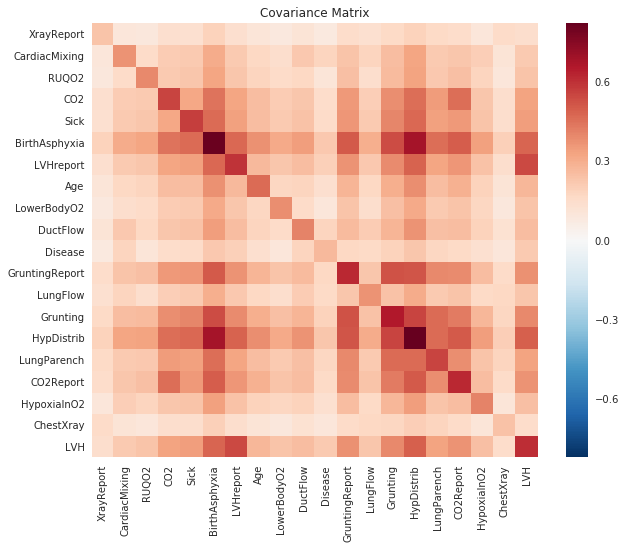

In [7]:
pf.session.visualize_covariance()

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


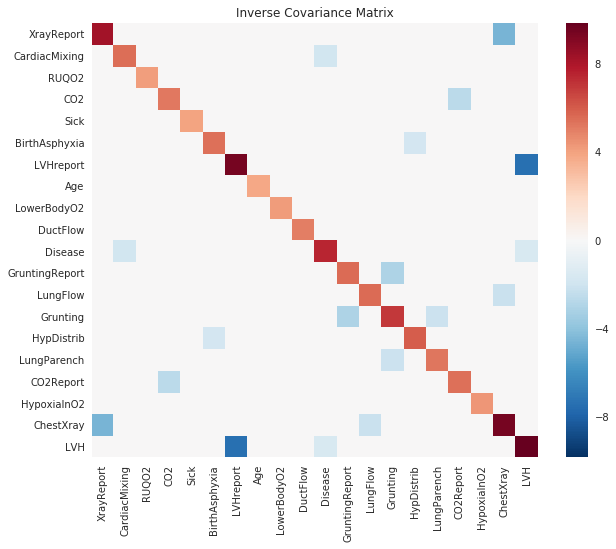

none-zero pairs of abs inv


In [8]:
pf.session.visualize_inverse_covariance()

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


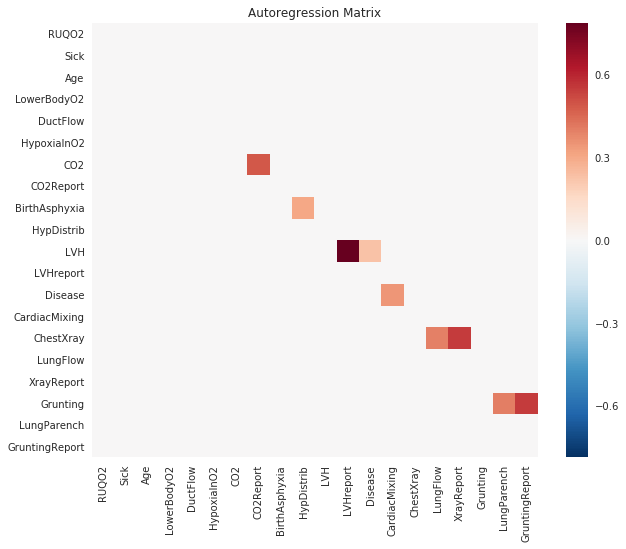

In [9]:
pf.session.visualize_autoregression()

In [10]:
pf.session.timer.get_stat()
pf.session.timer.to_csv()